In [183]:
import pandas as pd

In [184]:
titanic = pd.read_csv("titanic_train.csv")

In [185]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [186]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [187]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

In [188]:
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

In [189]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [190]:
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

In [192]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [193]:
alg = LinearRegression()

In [194]:
kf = KFold(titanic.shape[0], n_folds = 3, random_state = 1)

In [195]:
predictions = []

In [196]:
for train, test in kf:
    train_predictors = (titanic[predictors].iloc[train, :])
    train_target = titanic["Survived"].iloc[train]
    alg.fit(train_predictors, train_target)
    test_predictions = alg.predict(titanic[predictors].iloc[test, :])
    predictions.append(test_predictions)
    
    

In [197]:
import numpy as np

In [198]:
predictions = np.concatenate(predictions, axis = 0)
#the predictions were in 3 separate numpy arrays

In [199]:
predictions[predictions > 0.5] = 1
predictions[predictions < 0.5] = 0

In [200]:
accuracy = sum(predictions[predictions == titanic["Survived"]])/ len(predictions)
# as for kaggle

In [201]:
from sklearn.metrics import accuracy_score

In [202]:
accuracy = accuracy_score(predictions, titanic["Survived"])
print(accuracy)

0.783389450056


In [203]:
########################################################################################################################

In [204]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

In [205]:
alg = LogisticRegression(random_state = 1)

In [206]:
#X = diabetes.data[:150]         
#y = diabetes.target[:150]
#lasso = linear_model.Lasso()   
#print(cross_val_score(lasso, X, y))   
#[ 0.33150734  0.08022311  0.03531764]
# cv = 3  integer, to specify the number of folds in a (Stratified)KFold,
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv = 3)

In [207]:
print(scores.mean())

0.787878787879


In [208]:
# now on test-data for LogisticRegression

In [300]:
titanic_test = pd.read_csv("titanic_test.csv")

In [301]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [303]:
titanic_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [210]:
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())

In [211]:
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

In [212]:
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1

In [213]:
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 2

In [214]:
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())

In [215]:
alg = LogisticRegression(random_state = 1)
alg.fit(titanic[predictors], titanic["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [216]:
predictions = alg.predict(titanic_test[predictors])

In [217]:
#submission = pd.DataFrame({"PassengerId": titanic_test["PassengerId"], "Survived" : predictions})

In [218]:
#submission.to_csv("kag1.csv", index = False)

In [219]:
# accuracy was around 75%

In [220]:
#use better alg
#generate better features
#combine multiple ml algs

In [221]:
########################################################################################################################

In [222]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
alg = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 2, min_samples_leaf = 1)

In [224]:
#n_estimators = no of trees we want to make
#min_samples_split = min no of rows we need to make a split
#min_samples_leaf = min no of samples we can have at the place a tree branch ends(bottom points of tree)

In [225]:
kf = cross_validation.KFold(titanic.shape[0], n_folds = 3, random_state = 1)

In [226]:
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv = kf)

In [227]:
print(scores.mean())

0.785634118967


In [228]:
# to improve accuracy , increase no of trees

In [229]:
alg = RandomForestClassifier(random_state = 1, n_estimators = 50, min_samples_split = 4, min_samples_leaf = 2)

In [230]:
kf = cross_validation.KFold(titanic.shape[0], n_folds = 3, random_state = 1)

In [231]:
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv = kf)

In [232]:
print(scores.mean())

0.81593714927


In [233]:
# to improve accuracy, increase no of features

In [234]:
#1st new
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

In [235]:
#2nd new
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

In [236]:
#3rd new
import re

In [237]:
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [238]:
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Sir           1
Lady          1
Countess      1
Capt          1
Don           1
Mme           1
Jonkheer      1
Name: Name, dtype: int64


In [239]:
title_mapping = { "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle" : 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}

In [240]:
# what?
#to verify whether we converted all
for k,v in title_mapping.items():
    titles[titles == k] = v

In [241]:
print(pd.value_counts(titles))

1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [242]:
titanic["Titles"] = titles

In [243]:
#4th new
import operator

In [244]:
family_id_mapping = {}
#mapping family name to id

In [245]:
#what?
#creating unique family id
def get_family_id(row):
    last_name = row["Name"].split(",")[0]
#find the last name
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
#create family id
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            current_id = (max(family_id_mapping.items(), key = operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

In [246]:
#some error here

In [247]:
family_ids = titanic.apply(get_family_id, axis = 1)

In [248]:
family_ids[titanic["FamilySize"] <3] = -1

In [249]:
print(pd.value_counts(family_ids))

-1      800
 14       8
 149      7
 63       6
 50       6
 59       6
 17       5
 384      4
 27       4
 25       4
 162      4
 8        4
 84       4
 340      4
 43       3
 269      3
 58       3
 633      2
 167      2
 280      2
 510      2
 90       2
 83       1
 625      1
 376      1
 449      1
 498      1
 588      1
dtype: int64


In [250]:
titanic["FamilyId"] = family_ids

In [251]:
import numpy as np

In [252]:
#5th new
#selecting k best features


In [253]:
from sklearn.feature_selection import SelectKBest, f_classif

In [254]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Titles", "FamilyId","NameLength"]

In [255]:
selector = SelectKBest(f_classif, k = 5)

In [256]:
selector.fit(titanic[predictors], titanic["Survived"])

SelectKBest(k=5, score_func=<function f_classif at 0x000001F51B2837B8>)

In [257]:
scores = -np.log10(selector.pvalues_)
scores
len(predictors)

11

In [258]:
import matplotlib.pyplot as plt

In [259]:
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation = 'vertical')

([<matplotlib.axis.XTick at 0x1f51d4c8588>,
 <a list of 11 Text xticklabel objects>)

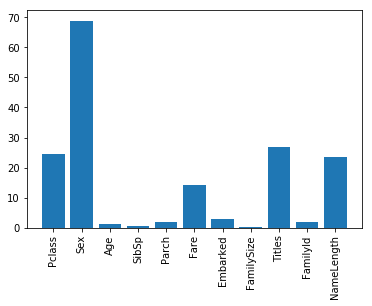

In [260]:
plt.show()

In [261]:
#picking out better features
predictors = ["Pclass", "Sex","Fare", "Titles"]

In [262]:
alg = RandomForestClassifier(random_state = 1, n_estimators = 50, min_samples_split = 8, min_samples_leaf = 4)

In [263]:
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv = 3)

In [264]:
print(scores.mean())

0.817059483726


In [265]:
#6th new
#gradient boosting involves training decision trees one after another and feeding errors from one tree into next
#causes overfitting (usually with trees > 100)

In [266]:
#we'll now use ensemble method
#logistic regression is used on linear predictors that have correlation with Survived column
#and gradient boosting on all predictors

In [267]:
from sklearn.ensemble import GradientBoostingClassifier

In [268]:
algorithms = [[GradientBoostingClassifier(random_state = 1, n_estimators = 25, max_depth = 3), ["Pclass", "Sex", "Age","Fare","Embarked", "FamilySize", "Titles", "FamilyId"]], [LogisticRegression(random_state = 1), ["Pclass", "Sex", "Fare", "FamilySize", "Titles", "Age", "Embarked"]]]

In [269]:
kf = KFold(titanic.shape[0], n_folds = 3, random_state = 1)

In [270]:
predictions = []

In [271]:
#what?
for train, test in kf:
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    for alg, predictors in algorithms:
        alg.fit(titanic[predictors].iloc[train, :], train_target)
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test, :].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0] + full_test_predictions[1])/2
    test_predictions[test_predictions > 0.5] = 1
    test_predictions[test_predictions < 0.5] = 0
    predictions.append(test_predictions)


In [272]:
predictions = np.concatenate(predictions, axis = 0)

In [273]:
accuracy = sum(predictions[predictions == titanic["Survived"]])/len(predictions)

In [274]:
print(accuracy)

0.278338945006


In [275]:
titles = titanic_test["Name"].apply(get_title)

In [276]:
title_mapping = { "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle" : 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}

In [277]:
for k,v in title_mapping.items():
    titles[titles == k] = v


In [278]:
titanic_test["Titles"] = titles

In [279]:
print(pd.value_counts(titanic_test["Titles"]))

1     240
2      79
3      72
4      21
7       2
6       2
10      1
5       1
Name: Titles, dtype: int64


In [280]:
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]

In [281]:
print(family_id_mapping)

{'Braund1': 1, 'Cumings1': 2, 'Heikkinen0': 3, 'Futrelle1': 4, 'Allen0': 5, 'Moran0': 6, 'McCarthy0': 7, 'Palsson4': 8, 'Johnson2': 9, 'Nasser1': 10, 'Sandstrom2': 11, 'Bonnell0': 12, 'Saundercock0': 13, 'Andersson6': 14, 'Vestrom0': 15, 'Hewlett0': 16, 'Rice5': 17, 'Williams0': 18, 'Vander Planke1': 19, 'Masselmani0': 20, 'Fynney0': 21, 'Beesley0': 22, 'McGowan0': 23, 'Sloper0': 24, 'Asplund6': 25, 'Emir0': 26, 'Fortune5': 27, "O'Dwyer0": 28, 'Todoroff0': 29, 'Uruchurtu0': 30, 'Spencer1': 31, 'Glynn0': 32, 'Wheadon0': 33, 'Meyer1': 34, 'Holverson1': 35, 'Mamee0': 36, 'Cann0': 37, 'Vander Planke2': 38, 'Nicola-Yarred1': 39, 'Ahlin1': 40, 'Turpin1': 41, 'Kraeff0': 42, 'Laroche3': 43, 'Devaney0': 44, 'Rogers0': 45, 'Lennon1': 46, "O'Driscoll0": 47, 'Samaan2': 48, 'Arnold-Franchi1': 49, 'Panula5': 50, 'Nosworthy0': 51, 'Harper1': 52, 'Faunthorpe1': 53, 'Ostby1': 54, 'Woolner0': 55, 'Rugg0': 56, 'Novel0': 57, 'West3': 58, 'Goodwin7': 59, 'Sirayanian0': 60, 'Icard0': 61, 'Harris1': 62, 'Sko

In [282]:
family_ids = titanic_test.apply(get_family_id, axis = 1)

In [283]:
family_ids[titanic_test["FamilySize"]<3] = -1
#titanic_test["Name"]

In [284]:
titanic_test["FamilyId"] = family_ids

In [285]:
titanic_test["NameLength"] = titanic_test["Name"].apply(lambda x:len(x))

In [286]:
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Titles", "FamilyId"]

In [287]:
algorithms = [[GradientBoostingClassifier(random_state = 1, n_estimators = 25, max_depth = 3), predictors], [LogisticRegression(random_state = 1), ["Pclass", "Sex", "Fare", "FamilySize", "Titles", "Age", "Embarked"]]]

In [292]:
full_predictions = []


In [294]:
for alg,predictors in algorithms:
    alg.fit(titanic[predictors], titanic["Survived"])
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

In [295]:
predictions = (full_predictions[0]*3 + full_predictions[1])/4

In [296]:
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
predictions = predictions.astype(int)

In [299]:
#submission = pd.DataFrame({"PassengerId" : titanic_test["PassengerId"], "Survived": predictions})
#submission.to_csv("kaggle.csv", index = False)